# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import io

Expected value: 2.471


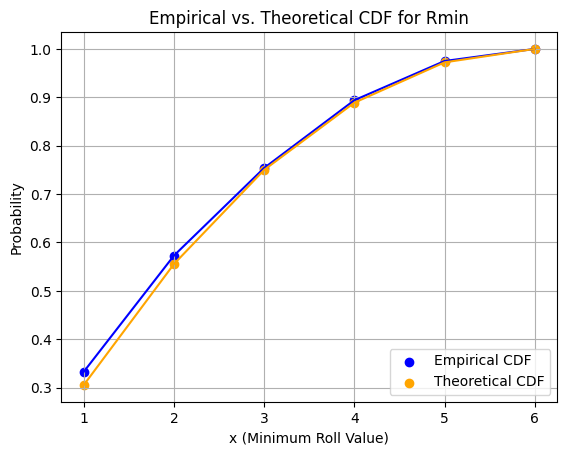

In [20]:
## Part 1

sides = np.array([1, 2, 3, 4, 5, 6])

prob_dist = np.zeros(6)
for roll1 in range(6):
    for roll2 in range(6):
        min_value = np.min([sides[roll1], sides[roll2]])
        prob_dist[min_value - 1] += 1

prob_dist /= 36
cum_dist = np.cumsum(prob_dist)

num_trials = 1000
die1_rolls = np.random.choice(sides, size=num_trials)
die2_rolls = np.random.choice(sides, size=num_trials)
min_values = [min(die1_rolls[i], die2_rolls[i]) for i in range(num_trials)]

expected_value = np.sum(min_values) / num_trials
print('Expected value:', expected_value)

empirical_cdf = np.zeros(6)
for k in range(6):
    empirical_cdf[k] = (1 / num_trials) * np.sum(np.array(min_values) <= sides[k])

plt.scatter(sides, empirical_cdf, label='Empirical CDF', color='blue')
plt.plot(sides, empirical_cdf, color='blue')
plt.scatter(sides, cum_dist, label='Theoretical CDF', color='orange')
plt.plot(sides, cum_dist, color='orange')
plt.xlabel("x (Minimum Roll Value)")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical vs. Theoretical CDF for Rmin')
plt.grid()
plt.show()

> The probability of getting a 1 as $R_{min}$ is 11/36, 2 is 9/36, 3 is 7/36, 4 is 5/36, 5 is 3/36, 6 is 1/36. The lower numbers are more likely to be $R_{min}$ compared to the higher numbers. The expected value of $R_{min}$ is around 2.5.

Expected value: 3.472


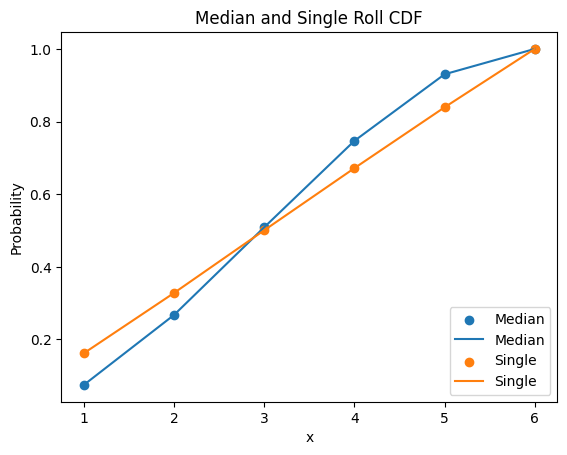

In [14]:
## Part 2
sides = np.array([1, 2, 3, 4, 5, 6])
num_trials = 5000
die1_rolls = np.random.choice(sides, size=num_trials)
die2_rolls = np.random.choice(sides, size=num_trials)
die3_rolls = np.random.choice(sides, size=num_trials)
median_values = [int(np.median([die1_rolls[i], die2_rolls[i], die3_rolls[i]])) for i in range(num_trials)]

expected_value = np.sum(median_values) / num_trials
print('Expected value:', expected_value)

empirical_cdf = np.zeros(6)
single_cdf = np.zeros(6)
for k in range(6):
    empirical_cdf[k] = (1 / num_trials) * np.sum(np.array(median_values) <= sides[k])
    single_cdf[k] = (1 / num_trials) * np.sum(die1_rolls <= sides[k])

plt.scatter(sides, empirical_cdf, label='Median')
plt.plot(sides, empirical_cdf, label='Median')
plt.scatter(sides, single_cdf, label='Single')
plt.plot(sides, single_cdf, label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

> The probability of getting a 1 as $R_{med}$ is 1/216, 2 is 20/216, 3 is 51/216, 4 is 51/216, 5 is 20/216, 6 is 1/216. The middle numbers (3 and 4) are more likely to be $R_{med}$ compared to the end numbers (1 and 6). The expected value of $R_{min}$ is around 3.5.

                  0
count  50000.000000
mean       4.197500
std        3.231926
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       35.000000


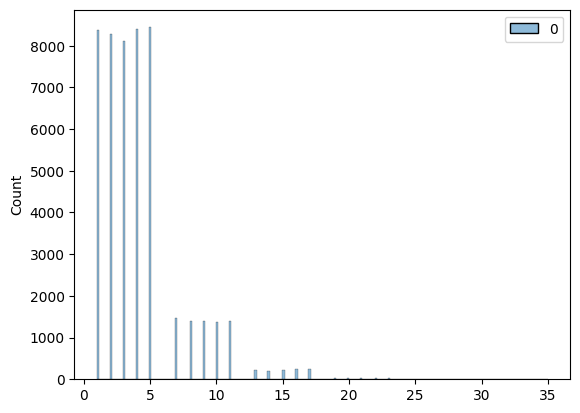

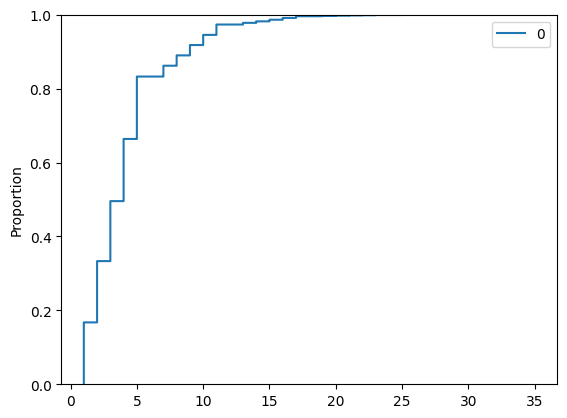

In [15]:
## Part 3
sides = np.array([1, 2, 3, 4, 5, 6])
num_trials = 50000
totals = []

for _ in range(num_trials):
    rolling = True
    total = 0
    while rolling:
        roll = np.random.choice(sides, size=1)
        total += roll
        if roll < 6:
            rolling = False
            totals.append(int(total[0]))

totals = pd.DataFrame(totals)

print(totals.describe())

sns.histplot(totals)
plt.show()

sns.ecdfplot(totals)
plt.show()

> The probability for getting 1, 2, 3, 4, and 5 are the highest and pretty even since the counting stops at these values. The probability of a 6 (and every multiple of 6) is 0 because you have to roll again after. The probability of 7 to 11 exhibits the same pattern as 1-5 but smaller because you have to roll a 6 first. This pattern continues.

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [22]:
from google.colab import files
uploaded = files.upload()

Saving mammogram.csv to mammogram.csv


In [23]:
## Part 1
df = pd.read_csv(io.BytesIO(uploaded['mammogram.csv']))
print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 

Raw treatment effect:  0.00011505110015985753


> The difference in 25-year survival rates is about 0.01%.

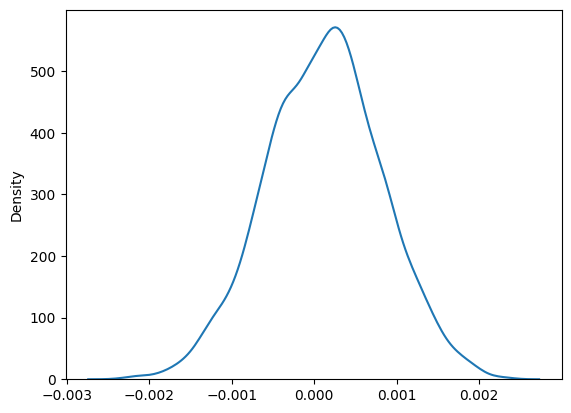

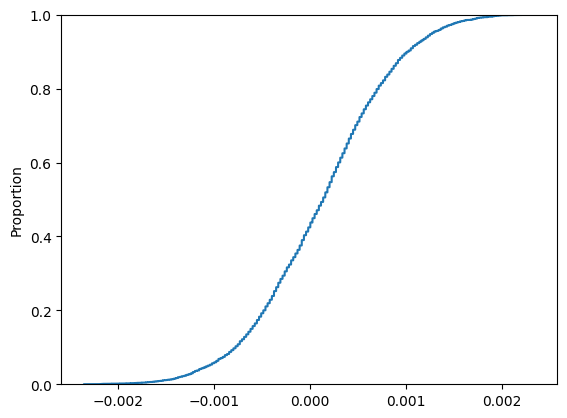

In [24]:
## Part 2
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

In [25]:
## Part 3
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.0017104441121158598 ,  0.0018960723524586109 )


> It does include 0

Part 4
\
\
The 99% confidence interval including 0 means the mammogram most likely did not affect survival rates between the two. These data might overstate the conclusions reached because they do not include anything accept for qualitative 'yes' or 'no' options for whether of not the person survived and if the person had a mammogram done. To better understand the results, some information regarding the person is critical. For instance, the person's age, degree of breast cancer, and income play huge roles in determining mortality rate (younger, richer, less serious breast cancer patients would most likely have a higher mortality rate, but then again we do not have the data to confirm this hypothesis). Other data about the mammogram performed would also be crucial, such as how late into the cancer was the mammogram performed and if the mammogram was randomly done or not. Lastly, the only result being living or not doesn't really give us any information on mammograms. We don't know if the person had a better life with the mammogram or a worse one.